In [269]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.lda import LDA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import math
import scipy.linalg
import scipy.spatial.distance

In [270]:
# Load dataset
iris = load_iris()

In [271]:
def splitTrainTest(X, y, ratio=0.2):
    n = X.shape[0]
    idx = np.random.permutation(n)
    testIdx = idx[:math.floor(n*0.2)]
    trainIdx = idx[math.floor(n*0.2):]
    testX = X[testIdx, :]
    testY = y[testIdx]
    trainX = X[trainIdx, :]
    trainY = y[trainIdx]
    return (trainX, trainY), (testX, testY)

(120, 4) (30, 4)


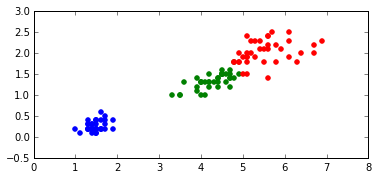

In [272]:
# Split train/test set
(trainX, trainY), (testX, testY) = splitTrainTest(iris.data, iris.target, 0.5)

print trainX.shape, testX.shape

# Plot 2 features
plt.scatter(trainX[trainY == 0, 2], trainX[trainY == 0, 3], color="blue")
plt.scatter(trainX[trainY == 1, 2], trainX[trainY == 1, 3], color="green")
plt.scatter(trainX[trainY == 2, 2], trainX[trainY == 2, 3], color="red")

plt.axes().set_aspect('equal')

plt.show()

In [273]:
# Train classifier
lda = LDA(solver="svd")
lda.fit(trainX, trainY)

testYPredicted = lda.predict(testX)

# Print confusion matrix
print(confusion_matrix(testY, testYPredicted))
# plt.imshow(confusion_matrix(testY, testYPredicted), interpolation='nearest')

[[ 6  0  0]
 [ 0 11  1]
 [ 0  0 12]]


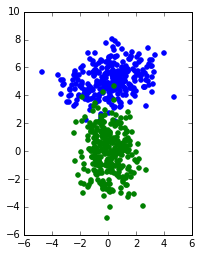

In [274]:
# Generate 2 gaussian datasets
n, dim = 300, 2

c0 = np.array([[0., -1.], [2.5, .7]])
c1 = c0.T

m0 = (0, 5)
m1 = (0, 0)

X = np.vstack((np.random.multivariate_normal(m0, c0, n), 
               np.random.multivariate_normal(m1, c1, n)))
y = np.hstack((np.zeros(n), np.ones(n)))


# Plot generated datasets
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="green")

plt.axes().set_aspect('equal')

plt.show()

In [289]:
# Show Mahalanobis based classification
sample = np.random.multivariate_normal(m0, c0)

print sample

print scipy.spatial.distance.mahalanobis(sample, m0, scipy.linalg.pinv(c0))
print scipy.spatial.distance.mahalanobis(sample, m1, scipy.linalg.pinv(c1))

[-0.96795092  6.21615441]
0.984198551685
1.96786675331
